# Student's *T* Distribution

---

## Import

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statistics
from scipy import stats

%matplotlib inline
plt.style.use("fivethirtyeight")

---

## Utilities

In [2]:
def get_bins(xmin, xmax, step = 1):
    bins = np.arange(xmin, xmax, step)
    bins = bins if len(bins) > 2 else get_bins(xmin, xmax + 1, step)
    return bins if len(bins) <= 100 \
        else get_bins(xmin, xmax, step = step + 1)

In [3]:
def get_continuous_ticks(xmin, xmax):
    cuts = [5, 10, 20, 50, 100, 200, 500, 1000]
    ticks = np.arange(int(np.floor(xmin)), int(np.ceil(xmax)) + 1)
    if len(ticks) > 15:
        for cut in cuts:
            ticks = [tick for tick in ticks if tick % cut == 0]
            if len(ticks) <= 15:
                return ticks
        return ticks
    return ticks

In [4]:
def plot_continuous_distribution(f, x_axis, obs = None, q = None, **kwargs):
    pdf = f.pdf(x_axis, **kwargs)
    
    fig, ax = plt.subplots(figsize = (8, 4))
    ax.plot(x_axis, pdf, alpha = 0.7, color = "k")
    ax.fill_between(x_axis, pdf, alpha = 0.4)
    
    print(f"Mean: {f.mean(**kwargs)}")
    print(f"Median: {f.median(**kwargs)}")
    print(f"Variance: {f.var(**kwargs)}")
    print(f"Standard Deviation: {f.std(**kwargs)}")
    
    plt.xticks(get_continuous_ticks(xmin = x_axis.min(), xmax = x_axis.max()))
    plt.show()

In [5]:
def sample_continuous_distribution(f, size = 1, seed = None, **kwargs):
    sample = f.rvs(size = size, random_state = seed, **kwargs)
    
    print(f"Min: {np.min(sample)}")
    print(f"Mean: {np.mean(sample)}")
    print(f"Median: {np.median(sample)}")
    print(f"Max: {np.max(sample)}")
    print(f"Variance: {np.var(sample, ddof = 0)}")
    print(f"Standard Deviation: {np.std(sample, ddof = 0)}")
    
    fig, ax = plt.subplots(figsize = (8, 4))
   
    plt.hist(x = sample,
             density = True,
             edgecolor = "k",
             bins = get_bins(sample.min(), sample.max() + 1),
             linewidth = 2)

    plt.xticks(get_continuous_ticks(sample.min(), sample.max()))
    plt.show()
    return sample

---

La *t-distribution* fa parte delle *sampling distributions*, cioè delle distribuzioni teoriche che sono state costruite come supporto ai processi inferenziali.

La **Student's t-distribution** è una distribuzione *unimodal* e *simmetrica*, e assomiglia molto alla *normale*, con l'unica differenza che le sue code sono molto più *spesse* ed il picco centrale è inferiore.

La *t-distribution* è governata da un solo parametro, i **degrees of freedom**, che ne influenzano lo spessore delle code. All'aumentare dei *df*, da $1$ a $+\infty$, la *t* assume un andamento sempre più simile alla *normale*, con meno spessore sulle code ed un picco più alto. Per *df* molto alti, le due distribuzioni non sono distinguibili.

Consideriamo due variabili aleatorie indipendenti $X$ e $Y$, con $X$ che segue l'andamento di una *standard normal* e $Y$ quello di una $\chi^2$ con $n$ *df*.

$$\large X\sim N(0,1)\;\;\;\;\;Y\sim \chi^2_n$$

Il seguente rapporto fra le due variabili segue l'andamento della *t-distribution* con $n$ *degrees of freedom*.

$$\large \frac{X}{\sqrt{\frac{Y}{n}}}\sim t_n$$

Quella che abbiamo appena descritto è una formulazione molto teorica della *t-distribution*, ma nasce da un'evidenza pratica.

Supponiamo di estrarre *n* osservazioni indipendenti da una popolazione gaussiana con media $\mu$ e varianza $\sigma^2$.

Possiamo creare una nuova variabile aleatoria sottraendo alla *sample mean* il valore della *population mean* e dividendo per il rapporto fra la *sample standard deviation* e la radice quadrata del *sample size*.

Si evidenzia come questa nuova variabile aleatoria segua precisamente l'andamento della *t-distribution* con $n-1$ *degrees of freedom*.

$$\large \frac{\bar{X}-\mu}{s/\sqrt{n}}\sim T_{df=n-1}$$

La *PDF* della *t-distribution* è:

$$\large f(x)=\frac{\Gamma(\frac{n+1}{2})}
{\Gamma(\frac{n}{2})\sqrt{n\pi}}
\left(1+\frac{x^2}{2}\right)^{-\frac{n+1}{2}}$$

L'**expectation** della *t-distribution* è zero a patto che i *df* siano strettamente maggiori di uno, altrimenti è indefinita.

$$\large E(X)=0$$

La **variance** della *t-distribution* è pari al rapporto fra $df$ e $df-2$, a patto che *df* sia strettamente maggiore di due.

$$\large E(X)=\frac{df}{df-2}$$

---

La *t-distribution* assume un ruolo centrale in tutti quegli scenari in cui la deviazione standard della popolazione è sconosciuta.

Sappiamo, infatti, che nella costruzione di *CI* della *population mean*, cioè utilizzando $\bar{X}$ come *statistic* di riferimento, per ragionare in modalità standardizzata abbiamo bisogno di applicare la seguente trasformazione:

$$\large Z=\frac{\bar{X}-\mu}{\sigma/\sqrt{n}}$$

Non conoscendo $\sigma$, dobbiamo usare la *sample standard deviation* per stimarla, ottenendo quindi:

$$\large \frac{\bar{X}-\mu}{s/\sqrt{n}}$$

Ma al contrario di $\sigma$, che è una costante, la *sample standard deviation* è una *statistic*, quindi ha una propria *sampling distribution*. Ciò implica che tutta la quantità appena descritta non segue più l'andamento della *standard normal*, bensì la *t-distribution* con $n-1$ *df*:

$$\large \frac{\bar{X}-\mu}{s/\sqrt{n}}\sim t_{df=n-1}$$

Il concetto di gradi di libertà per la *t-distribution* è strettamente legato ai gradi di libertà della *sample variance* $s^2$, che sappiamo essere esattamente $n-1$.

---

#### Probability Density Function

Mean: 0.0
Median: 6.976003623003317e-17
Variance: 1.6666666666666667
Standard Deviation: 1.2909944487358056


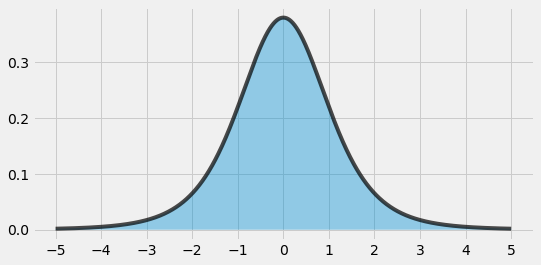

In [6]:
df = 5

x_axis = np.linspace(-5, 5, 1000)

plot_continuous_distribution(f = stats.t,
                             x_axis = x_axis,
                             df = df)

Mean: 0.0
Median: 6.654605374702225e-17
Variance: 1.0204081632653061
Standard Deviation: 1.0101525445522108


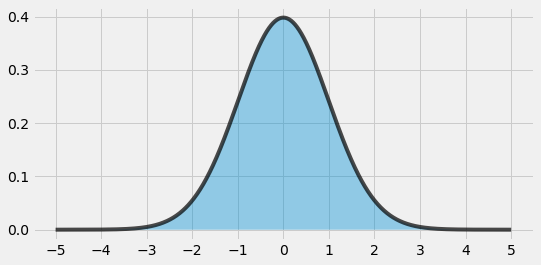

In [7]:
df = 100

x_axis = np.linspace(-5, 5, 1000)

plot_continuous_distribution(f = stats.t,
                             x_axis = x_axis,
                             df = df)

---

#### RVS

Min: -3.912860392829769
Mean: 0.0021665808881958597
Median: 0.002339286066707532
Max: 3.737448112940471
Variance: 1.0960397120988963
Standard Deviation: 1.0469191526086894


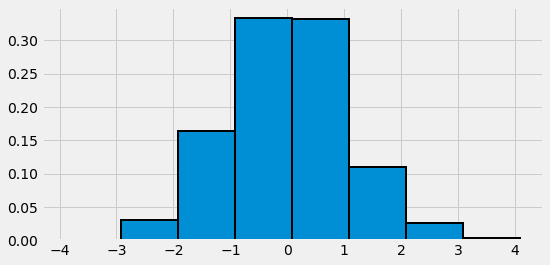

In [8]:
df = 100

sample = sample_continuous_distribution(f = stats.t,
                                        size = 1000,
                                        df = df)

---